<a href="https://colab.research.google.com/github/VaastavU/Credit-Card-Detection-System/blob/main/Credit_Card_Transactions_Predictios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies for the project.

Numpy, Pandas, matplotlib, seaborn, kearas, sklearn

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

Data Collection and Analysis

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49610.000000,49610.000000,49610.000000,49610.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,...,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000
mean,28803.556239,-0.242569,0.012235,0.693009,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,...,-0.028396,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983
std,13097.468525,1.885867,1.630704,1.510559,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,...,0.736050,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21734.250000,-0.992845,-0.562967,0.217605,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,...,-0.231664,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000
50%,33390.000000,-0.247223,0.079282,0.797007,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,...,-0.068396,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000
75%,38852.750000,1.155638,0.732318,1.431013,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,...,0.108082,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000
max,44135.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,...,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,...,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,...,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,...,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0
49609,44135,-4.719790,-4.249875,1.850000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(49610, 31)

In [ ]:
print(df['Class'].value_counts())

0.0    49461
1.0      148
Name: Class, dtype: int64


Conducting a Basic Exploratory Data Analysis (EDA), using plots and graphs.

Analysis Labels

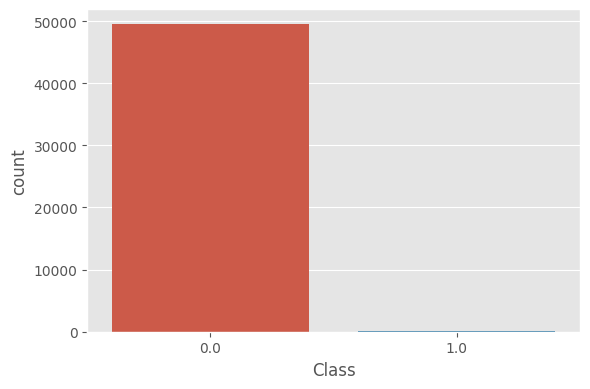

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.countplot(x = 'Class', data = df)
plt.tight_layout()

The Non-Fraudulent Cases and Fraudulent Cases are highly unbalanced in the current Data set.

Most if the features in Principal Component Analysis(PCA) form we need to focus on Time and Amount columns of the data set.

**Analysing Time**

In [ ]:
df['Time'].describe()

count    49610.000000
mean     28803.556239
std      13097.468525
min          0.000000
25%      21734.250000
50%      33390.000000
75%      38852.750000
max      44135.000000
Name: Time, dtype: float64

visualising the time for all transactions.

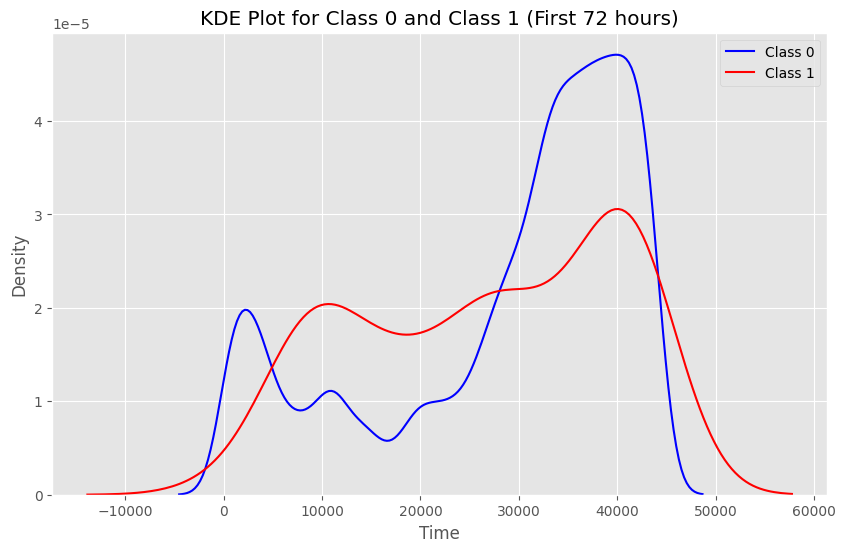

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.kdeplot(data=df.loc[df['Class'] == 0], x='Time', color='blue', label='Class 0')

sns.kdeplot(data=df.loc[df['Class'] == 1], x='Time', color='red', label='Class 1')

plt.title('KDE Plot for Class 0 and Class 1 (First 72 hours)')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()  # Show legend with labels

plt.show()

The fraudulent transactions are more evenly distributed than the non fraudulent ones.

Analysing the amounts of transactions

In [ ]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [ ]:
print(normal.shape)

(49461, 31)


In [ ]:
print(fraud.shape)

(148, 31)


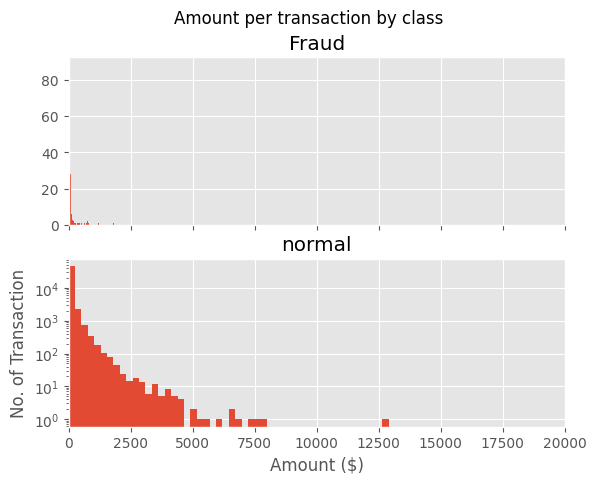

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

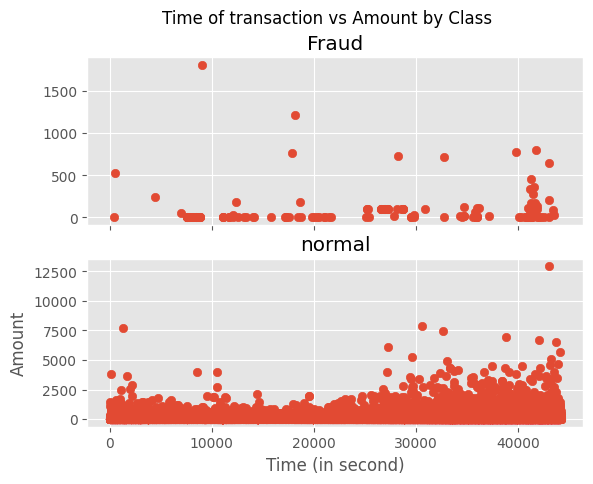

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in second)")
plt.ylabel("Amount")

plt.show()

In [ ]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,...,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.0
mean,28809.010473,-0.220239,-0.003947,0.726173,0.167967,-0.240785,0.111250,-0.096470,0.042413,0.134593,...,-0.031134,-0.106800,-0.039391,0.008275,0.135623,0.020410,0.003001,0.004455,93.099593,0.0
std,13097.700080,1.785773,1.588288,1.302574,1.357941,1.336709,1.303467,1.149329,1.170888,1.189733,...,0.731659,0.636952,0.583227,0.594262,0.435959,0.501698,0.381186,0.331815,253.325102,0.0
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-4.532523,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.0
25%,21766.000000,-0.987472,-0.564674,0.224091,-0.723487,-0.861998,-0.631646,-0.602138,-0.147001,-0.606017,...,-0.231859,-0.529131,-0.178567,-0.322145,-0.127727,-0.330779,-0.063404,-0.006631,7.680000,0.0
50%,33396.000000,-0.242349,0.076749,0.800522,0.184331,-0.285852,-0.148475,-0.075044,0.057604,0.014499,...,-0.069039,-0.082075,-0.051504,0.061999,0.175771,-0.072253,0.008765,0.022097,25.000000,0.0
75%,38849.000000,1.156122,0.727090,1.432833,1.060459,0.284100,0.495835,0.425854,0.329667,0.822165,...,0.106364,0.306998,0.078373,0.401422,0.421663,0.298741,0.083101,0.075961,85.000000,0.0
max,44134.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,18.709255,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,0.0


In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.0
mean,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676,1.0
std,12903.161451,8.446109,4.320160,8.656920,2.779889,6.552604,1.533685,6.905752,5.548758,2.597743,...,1.366614,0.854704,1.812868,0.538864,1.047281,0.383510,1.284073,0.653086,233.347471,0.0
min,406.000000,-30.552380,-5.198360,-31.103685,0.217805,-22.105532,-4.977692,-21.922811,-3.277535,-9.283925,...,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-1.055997,-3.908080,-1.869290,0.000000,1.0
25%,14132.250000,-14.252983,2.468091,-16.414044,3.965710,-10.215098,-3.154619,-14.625088,0.183394,-5.694795,...,0.302621,-0.665383,-0.588184,-0.379471,-0.270421,-0.209524,0.146804,-0.178057,1.000000,1.0
50%,27963.500000,-4.173544,4.256578,-7.244435,6.090188,-3.654495,-2.403531,-6.728542,1.400474,-3.700969,...,0.969561,-0.122859,-0.136185,0.056627,0.154845,0.203002,0.619595,0.207408,9.560000,1.0
75%,40968.250000,-1.733798,7.925178,-3.936051,7.526455,-1.036141,-1.246267,-2.195683,5.379616,-1.582983,...,1.813846,0.370372,0.197971,0.232789,1.022072,0.510054,1.510232,0.463395,99.990000,1.0
max,43494.000000,1.234235,16.713389,2.041003,11.927512,5.269255,3.628382,5.431271,20.007208,2.820829,...,3.147428,1.745315,2.661291,0.795190,2.208209,0.816762,3.052358,1.130625,1809.680000,1.0


<ipython-input-22-7188315ab755>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

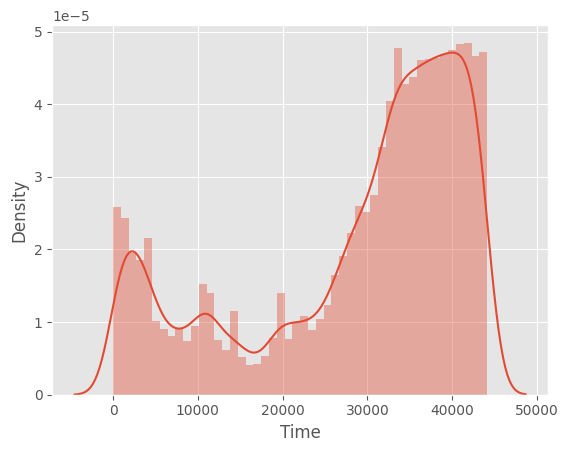

In [ ]:
sns.distplot(df['Time'])


Analysing the correlation of the fraud and normal data

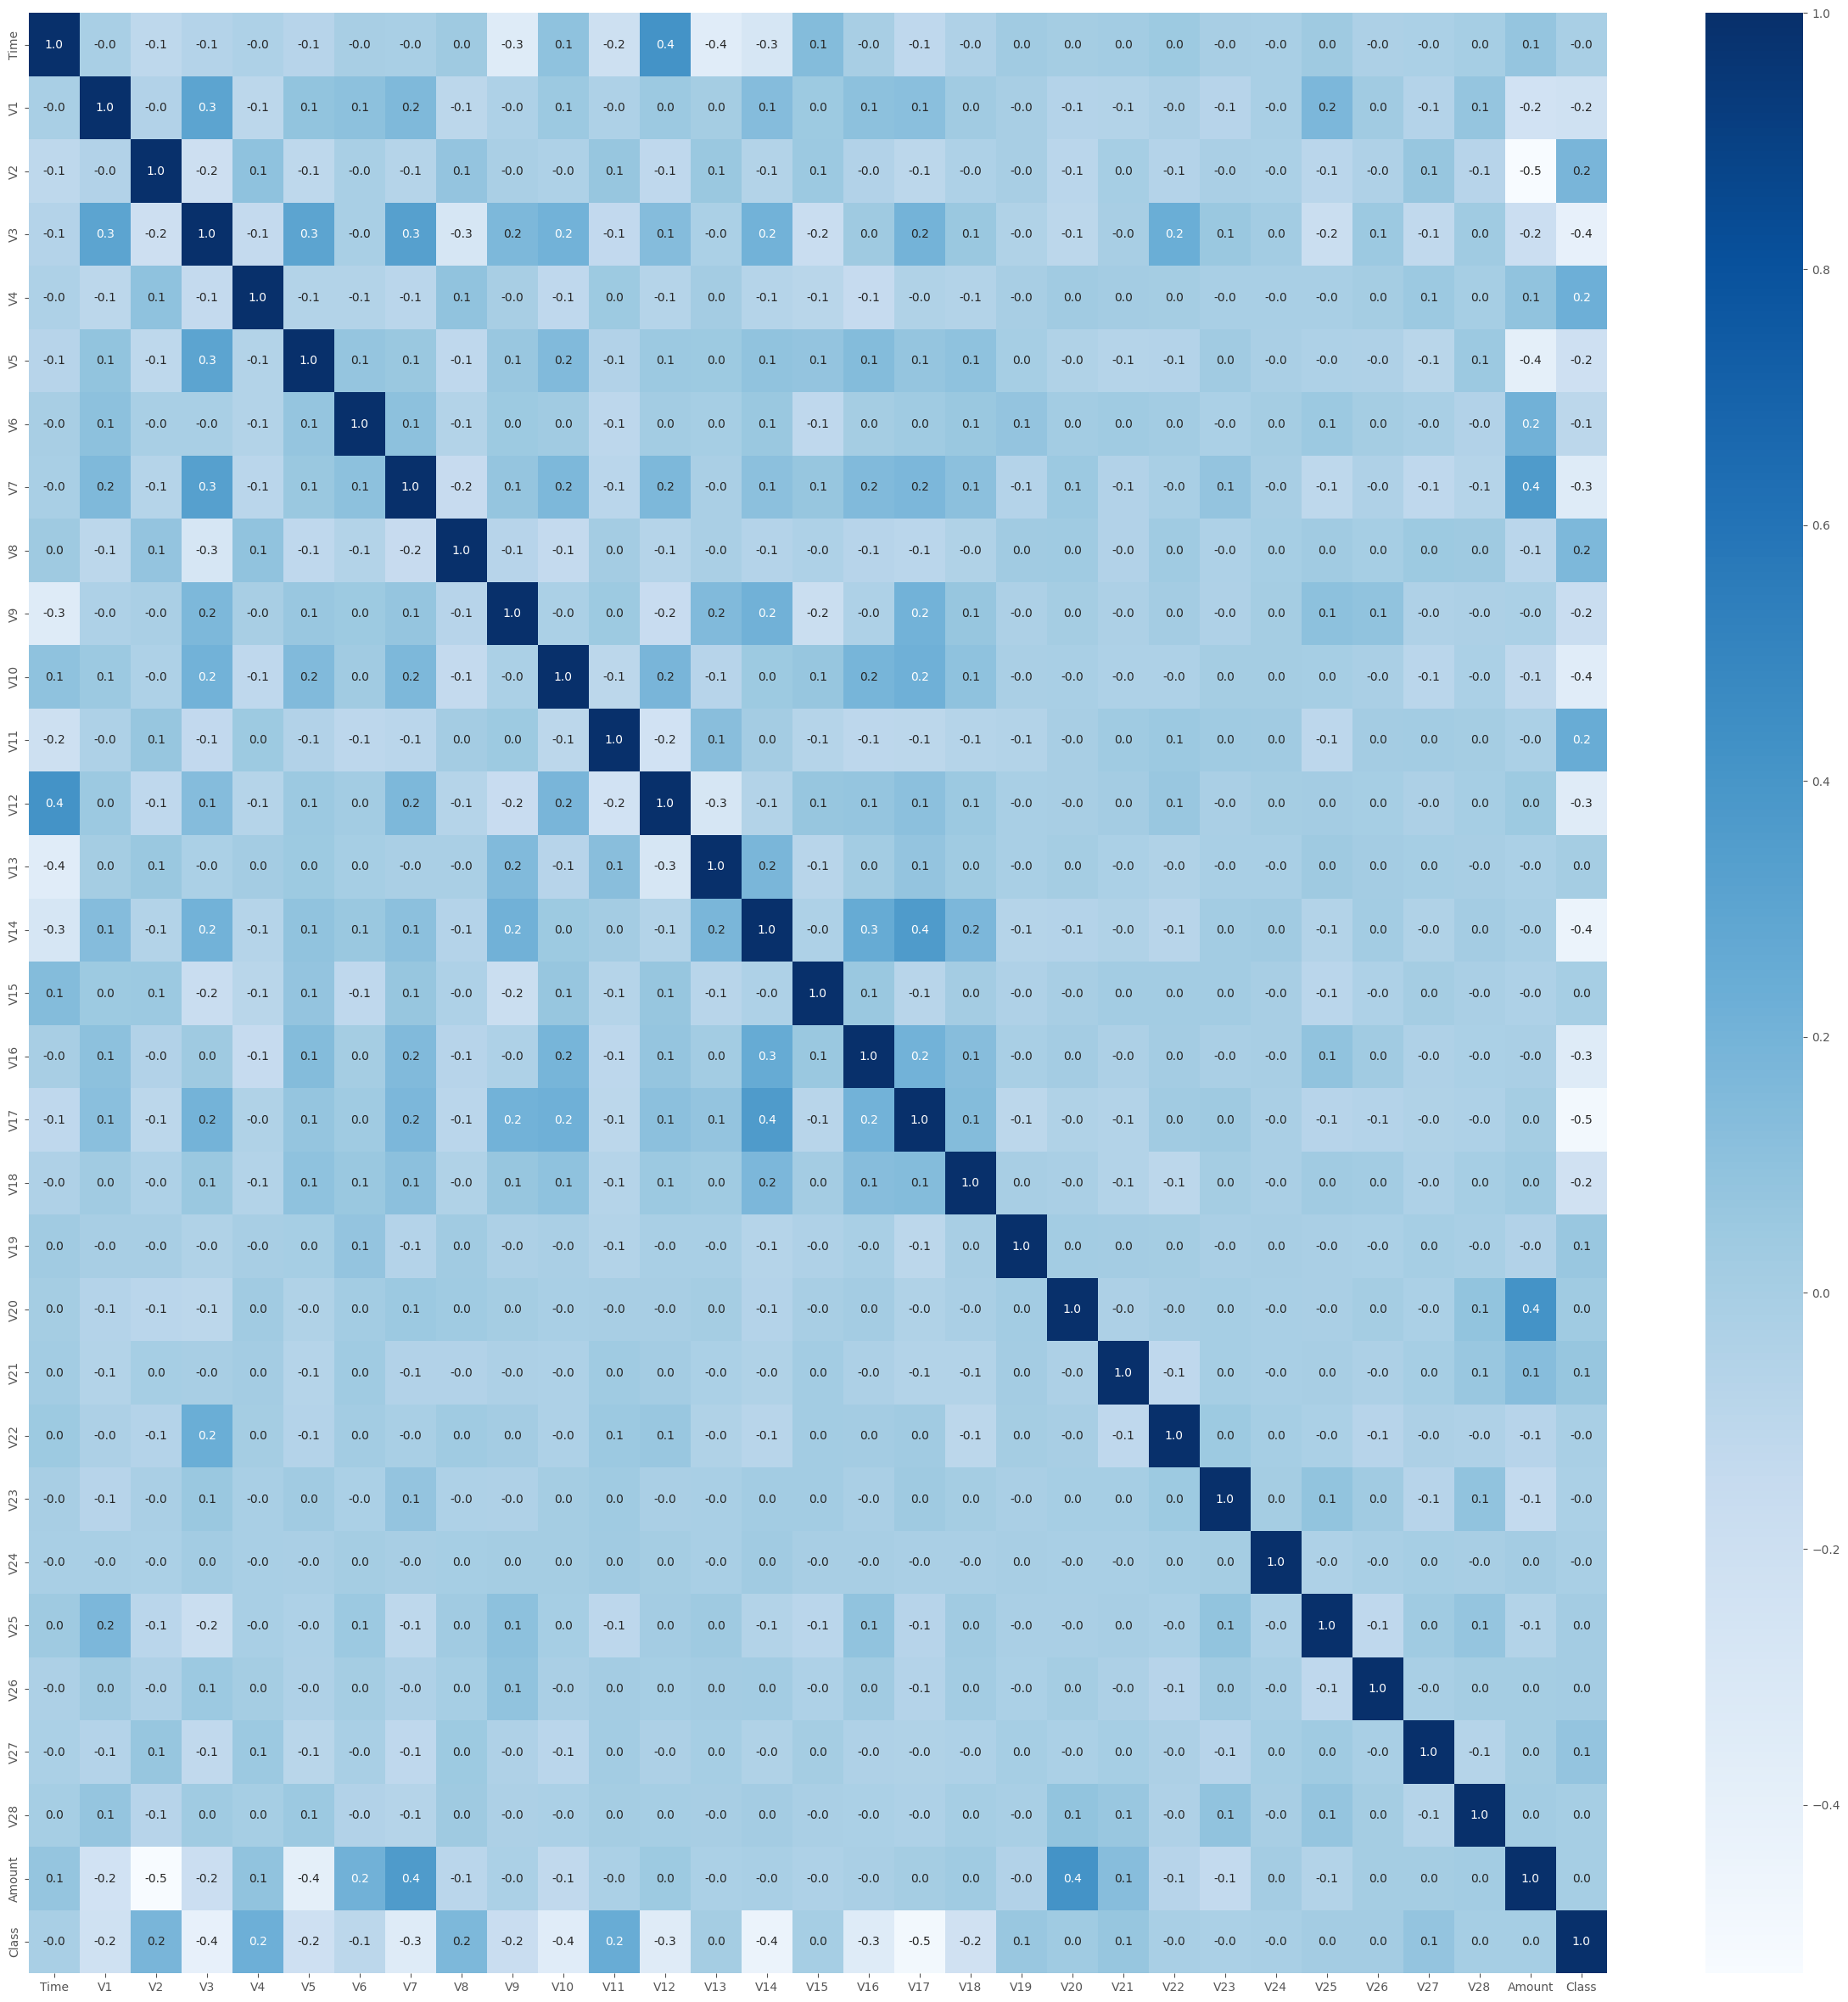

In [ ]:
corrmat = df.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(30,30))
g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='Blues', fmt = '.1f')

In [ ]:
X = df.drop(columns = 'Class', axis = 1)
Y = df['Class']

In [ ]:
print(X.shape)
print(Y.shape)

(49610, 30)
(49610,)


In [ ]:
normal = normal.sample(2000)
print(normal.shape)

(2000, 31)


In [ ]:
df_2 = fraud.append(normal).sample(frac = 1).reset_index(drop = True)
X = df_2.drop(columns = 'Class', axis = 1)
Y = df_2['Class']
print(X.shape)
print(Y.shape)

(2148, 30)
(2148,)


<ipython-input-45-90d3176df92b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = fraud.append(normal).sample(frac = 1).reset_index(drop = True)


In [ ]:
X.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,35276,-1.049107,0.222947,1.797166,-1.876299,-1.044449,-0.004266,-0.754385,0.803084,-1.226113,...,0.095605,0.544244,1.366986,-0.189982,0.043249,0.041203,-0.167867,0.228115,0.082276,22.00
1,36212,-0.813411,-0.545703,1.001316,-1.539364,-0.825860,-0.985167,1.082700,-0.251492,-1.434850,...,-0.035531,-0.135236,-0.435134,0.475804,0.362218,-0.311189,0.805297,-0.046190,0.143508,222.35
2,11345,1.047660,-0.058427,0.018182,1.512431,0.088900,0.003256,0.180058,-0.191909,1.664208,...,0.064112,-0.274870,-0.621089,-0.308961,-0.674955,0.795676,-0.330371,-0.028714,0.023361,129.41
3,27768,-1.262125,1.148266,1.699716,1.810567,-1.083102,0.597099,-0.603268,1.090712,0.102411,...,-0.203467,-0.165533,-0.260831,0.106860,0.430071,-0.370511,-0.470483,-0.131393,0.014240,21.00
4,29419,-3.647569,2.616771,-2.854492,1.168073,-2.145714,-1.423125,-0.824954,2.262248,-0.472581,...,-0.107033,0.170087,0.289661,-0.025825,0.404986,-0.418764,-0.391369,0.348737,-0.018231,89.99


In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

TSNE Visualisation of the data

In [ ]:
p = TSNE(n_components = 2, random_state = 24).fit_transform(X)
p

array([[-15.095801  ,  11.015483  ],
       [-14.951611  ,  -5.24808   ],
       [ 47.6952    ,   3.8504157 ],
       ...,
       [ 32.767204  ,  23.836958  ],
       [ 72.648315  ,   0.75949025],
       [ 46.094612  ,  15.865824  ]], dtype=float32)

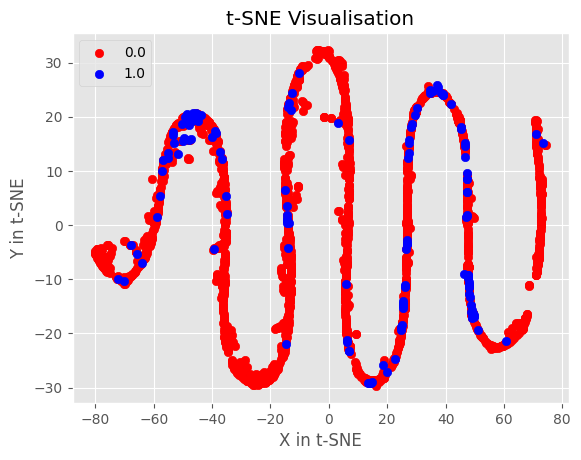

In [ ]:
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx,cl in enumerate(np.unique(Y)):
  plt.scatter(x = p[Y == cl, 0],
              y = p[Y == cl, 1],
              c = color_map[idx],
              label = cl)

plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.title('t-SNE Visualisation')
plt.legend(loc = 'upper left')
plt.show()

Constructing the Autoencoder

Scaling the Data

In [ ]:
X_scale = preprocessing.MinMaxScaler().fit_transform(X)
X_norm, X_fraud = X_scale[Y == 0],X_scale[Y == 1]

In [ ]:
print(X_norm.shape)
print(X_fraud.shape)

(2000, 30)
(148, 30)


Autoencoder

In [ ]:
autoencoder = Sequential()

In [ ]:
autoencoder.add(Dense(X.shape[1], activation = 'relu'))
autoencoder.add(Dense(100, activation = 'tanh'))
autoencoder.add(Dense(50, activation = 'relu'))
autoencoder.add(Dense(50, activation = 'tanh'))
autoencoder.add(Dense(100, activation = 'tanh'))
autoencoder.add(Dense(X.shape[1], activation = 'relu'))

In [ ]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse')

Training the autoencoder

In [ ]:
autoencoder.fit(X_norm, X_norm, batch_size = 256, epochs = 10, shuffle = True, validation_split = 0.2)

Epoch 1/10
7/7 [==============================] - 2s 42ms/step - loss: 0.3358 - val_loss: 0.3341
Epoch 2/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3355 - val_loss: 0.3338
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3352 - val_loss: 0.3335
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3349 - val_loss: 0.3332
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3345 - val_loss: 0.3328
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3342 - val_loss: 0.3325
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3339 - val_loss: 0.3322
Epoch 8/10
7/7 [==============================] - 0s 14ms/step - loss: 0.3335 - val_loss: 0.3318
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3332 - val_loss: 0.3315
Epoch 10/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3328 - val_loss: 0.3311


using this autoencoder, extract the hidden representation layer logic to filter the input data from the dataset.

In [ ]:
hidden_representation = Sequential()

In [ ]:
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [ ]:
norm_hid_rep = hidden_representation.predict(X_norm)

63/63 [==============================] - 0s 2ms/step


In [ ]:
fraud_hid_rep = hidden_representation.predict(X_fraud)

5/5 [==============================] - 0s 3ms/step


In [ ]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f, axis = 0)

print(rep_x.shape)
print(rep_y.shape)

(2148, 50)
(2148,)


t-SNE representation of the hidden representation

In [ ]:
p = TSNE(n_components = 2, random_state = 24).fit_transform(rep_x)
p

array([[-13.278593  ,  -0.71862787],
       [ 24.27643   ,  32.105972  ],
       [-21.620682  , -14.006266  ],
       ...,
       [-26.522156  ,  -9.10264   ],
       [ 28.332764  , -46.77965   ],
       [ 24.304895  ,   5.5206914 ]], dtype=float32)

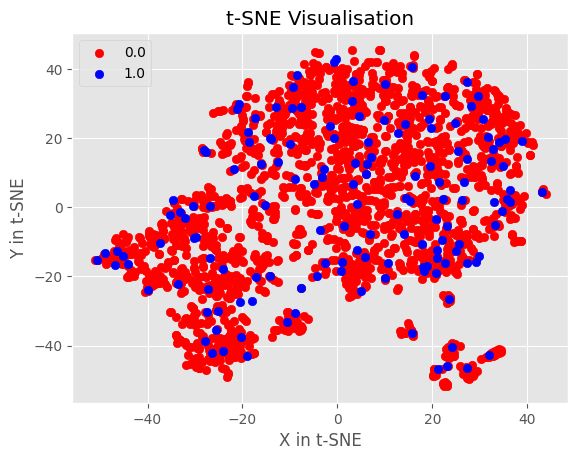

In [ ]:
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx,cl in enumerate(np.unique(Y)):
  plt.scatter(x = p[Y == cl, 0],
              y = p[Y == cl, 1],
              c = color_map[idx],
              label = cl)

plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.title('t-SNE Visualisation')
plt.legend(loc = 'upper left')
plt.show()

Training the Logistic Regression Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(rep_x, rep_y, test_size = 0.2, random_state=2, stratify=rep_y)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_predict = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_predict, Y_train)

In [ ]:
print("Accuracy score of training set: " , X_train_accuracy)

Accuracy score of training set:  0.9720605355064028


In [ ]:
X_test_predict = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_predict, Y_test)

In [ ]:
print("Accuracy score of testing set: " , X_test_accuracy)

Accuracy score of testing set:  0.9674418604651163


Very Good Accuracy Score.!!